# Import libraries like PIL,numpy,matplotlib

In [38]:
import matplotlib.pyplot as plt
from matplotlib import image
from os import listdir
import numpy as np
from PIL import Image

## Converting all 177 images to numpy arrays

In [39]:
collection_images = []
def create_arrays():
    for filename in listdir("face_data/"):
        image_array = np.asarray(Image.open("face_data/" + filename)).flatten()
        image_array = image_array.reshape(1,256 * 256)
        collection_images.append(image_array)
create_arrays()

## Splitting all images to training = 157 and testing = 20

In [40]:
train = collection_images[:157]
test = collection_images[157:]
len(train)
#len(test)

157

# Print function to print images using matplotlib

In [42]:
def print_new_image(r,array,x,y):
    for i in range(r):
        image = array[i].reshape(256,256)
        plt.subplot(x,y,1+i)
        plt.imshow(image,cmap = 'gray')
    plt.show()

## Calculating the mean face value of every image

In [44]:
mean_face_value = np.zeros((1,256*256))
for faces in train:
    mean_face_value = np.add(mean_face_value,faces)
mean_face_value = np.divide(mean_face_value,len(train))

# Normailizing the Mean faces

In [47]:
normalized_face_value = np.ndarray(shape = (len(train), 256*256))
for i in range(len(train)):
    normalized_face_value[i] = np.subtract(train[i],mean_face_value)

# Printing the normailsed Mean faces

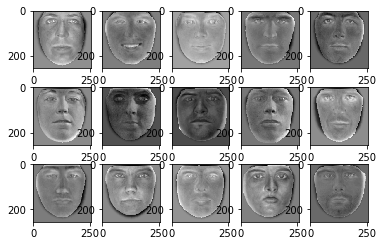

In [48]:
print_new_image(15,normalized_face_value,3,5)

# Applying Principle Component Analysis

# Eigenfaces


In [49]:
eigen_face_value, sig, V = np.linalg.svd(normalized_face_value.T, full_matrices=False)

### Constructing 15 eigen faces using PCA

In [50]:
eigen = [(sig[index], eigen_face_value[:,index]) for index in range(len(sig))]

In [51]:
eigen.sort(reverse=True)

In [52]:
sort_sig  = [eigen[index][0] for index in range(len(sig))]
sort_eigen_face_value = [eigen[index][1] for index in range(len(sig))]

# Printing the top 15 eigen faces

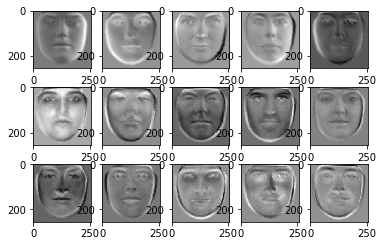

In [53]:
print_new_image(15,[eigen_face_value[:,i] for i in range(15)],3,5)

# Reconstructing Test images using PCA 

In [54]:
normalized_test_face_value = np.ndarray(shape = (len(test), 256*256))
for i in range(len(test)):
    normalized_test_face_value[i] = np.subtract(test[i],mean_face_value)

In [55]:
def reconstruction(K):
    reconstructed_face_value = []
    weights = np.dot(normalized_test_face_value,eigen_face_value)
    for i in range(len(test)):
        reconstructed_testing_values = mean_face_value + np.dot(weights[i,0:K], eigen_face_value[:,:K].T)
        reconstructed_face_value.append(reconstructed_testing_values)
    return reconstructed_face_value

reconstructed_faces_30 = reconstruction(30)

# Printing Reconstructed test images

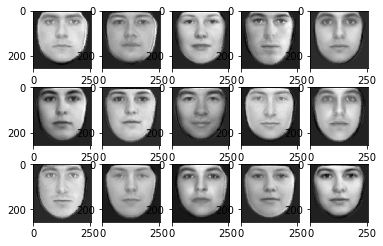

In [58]:
print_new_image(15,reconstructed_faces_30,3,5)

# Calculating the error on the reconstruction test images

In [60]:
def reconstruction_error_rate(test, reconstructed_face_value,normalized_test_face_value):
    err = 0
    for i in range(15):
        e = np.linalg.norm(np.linalg.norm(reconstructed_face_value[i] - normalized_test_face_value[i]))
        err += (e ** 2) / len(test)
    return err

err = reconstruction_error_rate(test,reconstructed_faces_30,normalized_test_face_value)
print(err)

580833739.7882409


# Plotting Reconstruction Error against multiple values of K

In [61]:
k_l = [5,10,30,50,100,125,150,250,275]
reconstruction_error_list = []
for i in k_l:
    reconstruction_error_list.append(reconstruction_error_rate(test,reconstruction(i),normalized_test_face_value))
    

Text(0, 0.5, 'ERROR')

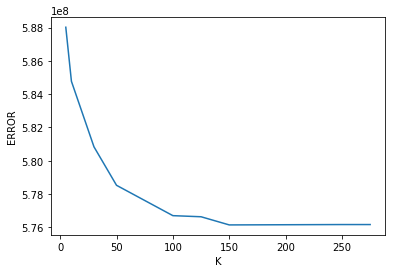

In [62]:
plt.plot(k_l,reconstruction_error_list)
plt.xlabel("K")
plt.ylabel("ERROR")